In [1]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train),(image, y_test) = load_data()
# help(X_train.reshape)
X_train = X_train.reshape(60000, 28, 28 ,1) #Adding grayscale channel to be compatible with keras model. 
X_test = X_test.reshape(10000, 28, 28 ,1) 

2023-05-18 13:29:40.136987: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 13:29:40.563397: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 13:29:40.565794: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 13:29:42.559378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


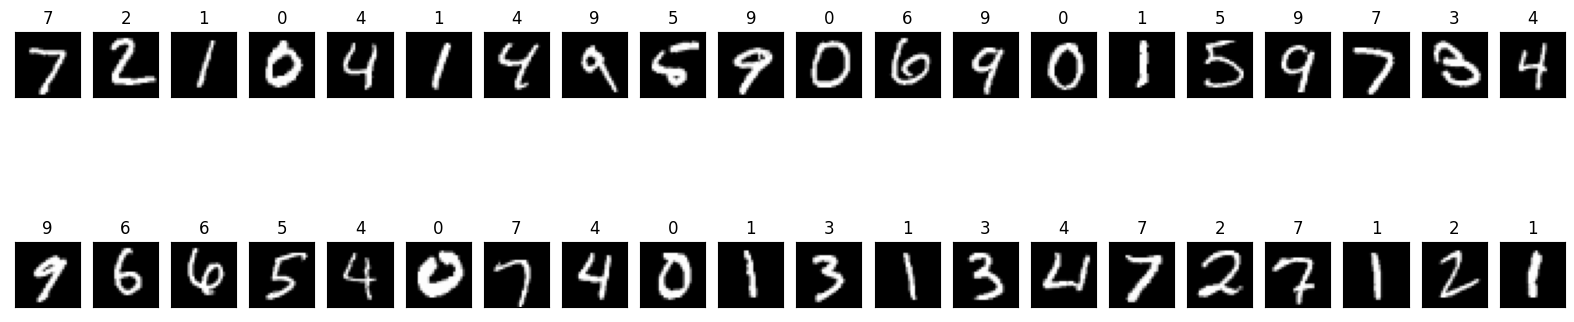

In [110]:
fig = plt.figure(figsize=(20,5))
for i in range(40):
    ax = fig.add_subplot(2, 20, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[i]),cmap='gray')
    ax.set_title(y_test[i])

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Defining a CNN model using 32 filter matrices of order 3x3 on a 28x28x1 grayscale image.
input_shape = X_train.shape[1:]
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2,2)))
# model.add(Dropout(0.3)) #To reduce the problem of overfitting (Optional). 
model.add(Flatten())
model.add(Dense(600, activation= 'relu'))
model.add(Dense(10, activation= 'sigmoid'))
model.summary()
# plot_model(model,'model.jpg', show_shapes=True)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 800)               0         
                                                                 
 dense_30 (Dense)            (None, 600)             

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = model.fit(X_train, y_train, epochs = 15, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 13s 34ms/step - loss: 0.8418 - accuracy: 0.9160 - val_loss: 0.0956 - val_accuracy: 0.9709
Epoch 2/15
375/375 [==============================] - 12s 31ms/step - loss: 0.0600 - accuracy: 0.9812 - val_loss: 0.0632 - val_accuracy: 0.9803
Epoch 3/15
375/375 [==============================] - 12s 32ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0778 - val_accuracy: 0.9783
Epoch 4/15
375/375 [==============================] - 12s 32ms/step - loss: 0.0238 - accuracy: 0.9921 - val_loss: 0.0662 - val_accuracy: 0.9837
Epoch 5/15
375/375 [==============================] - 12s 32ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0710 - val_accuracy: 0.9821
Epoch 6/15
375/375 [==============================] - 10s 27ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0751 - val_accuracy: 0.9820
Epoch 7/15
375/375 [==============================] - 10s 27ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0808 - val_accuracy:

INPUT IMAGE: 
----------------------------------------


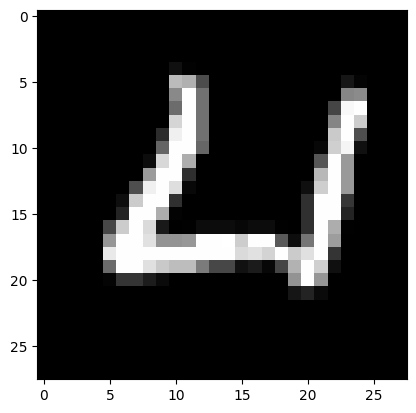

In [115]:
image = X_test[33]
print("INPUT IMAGE: \n----------------------------------------")
plt.imshow(np.squeeze(image), cmap='gray')
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

In [116]:
print("\n\nRunning Model on input data...")
prediction = model.predict(image)
print("\nPREDICTED VALUE: {}".format(np.argmax(prediction)))
prediction



Running Model on input data...
1/1 [==============================] - 0s 23ms/step

PREDICTED VALUE: 4


array([[9.5983423e-02, 9.1294491e-01, 6.0434431e-01, 6.8804211e-16,
        1.0000000e+00, 9.9143108e-08, 9.9981833e-01, 7.1289903e-04,
        8.2664089e-03, 1.2537382e-11]], dtype=float32)